# Treatment analysis in mices to see tumor reductions 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from itertools import compress
import seaborn as sns
from sklearn.linear_model import LinearRegression
import scipy.stats

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_df = pd.read_csv(mouse_metadata_path)
results_df = pd.read_csv(study_results_path)

# Combine the data into a single dataset
data=mouse_df.merge(results_df,on='Mouse ID',)
# Display the data table for preview


In [2]:
# Checking the number of mice.
print(f'Total unique mices: {data.shape[0]}')

Total unique mices: 1893


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
repeated=data['Mouse ID'][data[['Mouse ID','Timepoint']].duplicated()].unique()
print(f'The Mouse ID repeated are (is):\n {repeated}')

The Mouse ID repeated are (is):
 ['g989']


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
data[data[['Mouse ID','Timepoint']].duplicated()]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
data=data[~data[['Mouse ID','Timepoint']].duplicated()]

In [6]:
# Checking the number of mice in the clean DataFrame.
print(f'Total unique mices: {data.shape[0]}')

Total unique mices: 1888


## Summary Statistics

In [36]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

grouped=data[['Drug Regimen','Tumor Volume (mm3)']].groupby('Drug Regimen')
#mean
vol_mean=grouped.mean()
vol_mean.rename(columns={'Tumor Volume (mm3)':'Tumor Volume mean (mm3)'},inplace=True)
vol_mean.reset_index(inplace=True)

#std
vol_std=grouped.std()
vol_std.rename(columns={'Tumor Volume (mm3)':'Tumor Volume std (mm3)'},inplace=True)
vol_std.reset_index(inplace=True)

# #SEM
vol_sem=grouped.sem()
vol_sem.rename(columns={'Tumor Volume (mm3)':'Tumor Volume sem (mm3)'},inplace=True)
vol_sem.reset_index(inplace=True)

table_sum=vol_mean.merge(vol_std,on='Drug Regimen').merge(vol_sem, on='Drug Regimen')

In [37]:
table_sum

,Drug Regimen,Tumor Volume mean (mm3),Tumor Volume std (mm3),Tumor Volume sem (mm3)
0,Capomulin,40.675741,4.994774,0.329346
1,Ceftamin,52.591172,6.268188,0.469821
2,Infubinol,52.884795,6.567243,0.492236
3,Ketapril,55.235638,8.279709,0.603860
4,Naftisol,54.331565,8.134708,0.596466
5,Placebo,54.033581,7.821003,0.581331
6,Propriva,52.393463,6.568014,0.525862
7,Ramicane,40.216745,4.846308,0.320955
8,Stelasyn,54.233149,7.710419,0.573111
9,Zoniferol,53.236507,6.966589,0.516398


In [38]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
data[['Drug Regimen','Tumor Volume (mm3)']].groupby('Drug Regimen').agg(['mean','std','sem'])

Tumor Volume (mm3)                    
                           mean       std       sem
Drug Regimen                                       
Capomulin             40.675741  4.994774  0.329346
Ceftamin              52.591172  6.268188  0.469821
Infubinol             52.884795  6.567243  0.492236
Ketapril              55.235638  8.279709  0.603860
Naftisol              54.331565  8.134708  0.596466
Placebo               54.033581  7.821003  0.581331
Propriva              52.393463  6.568014  0.525862
Ramicane              40.216745  4.846308  0.320955
Stelasyn              54.233149  7.710419  0.573111
Zoniferol             53.236507  6.966589  0.516398

## Bar and Pie Charts

<IPython.core.display.Javascript object>


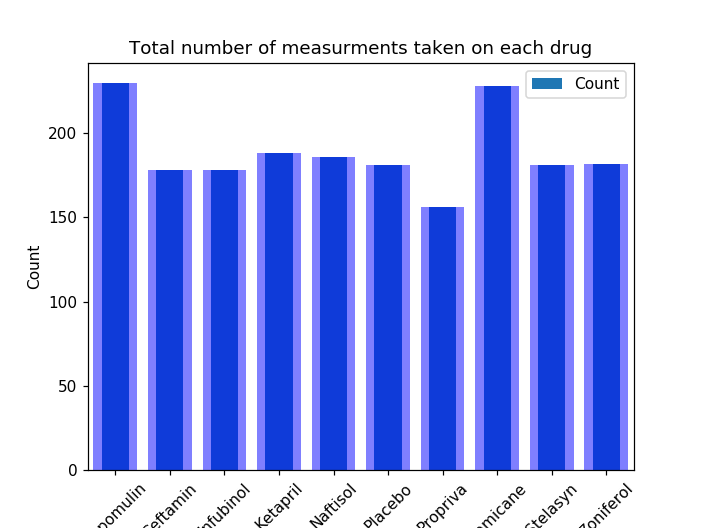

In [40]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
%matplotlib notebook

to_bar=grouped.count().reset_index().rename(columns={'Tumor Volume (mm3)':'Count'})
to_bar
to_bar.plot.bar(x='Drug Regimen',y='Count')

<IPython.core.display.Javascript object>


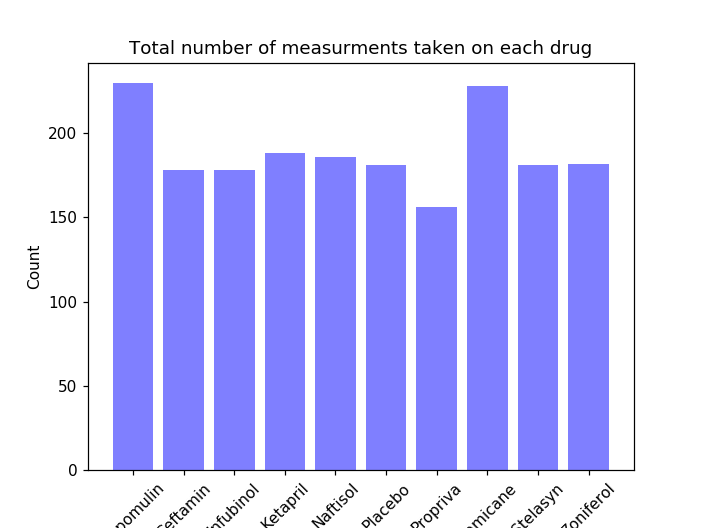

In [42]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
plt.bar(to_bar['Drug Regimen'], to_bar['Count'], color='b', alpha=0.5, align="center")
plt.xticks(rotation=45)
plt.title("Total number of measurments taken on each drug")
plt.xlabel("Drug Regimen")
plt.ylabel("Count")
plt.show()

<IPython.core.display.Javascript object>


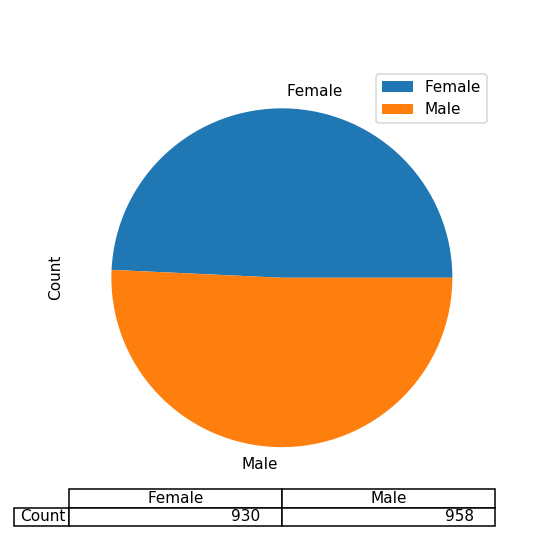

In [34]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

grouped=data[['Tumor Volume (mm3)','Sex']].groupby('Sex')
to_pie=grouped.count().rename(columns={'Tumor Volume (mm3)':'Count'})
to_pie.plot.pie(y='Count',table=True,figsize=(5, 5))


<IPython.core.display.Javascript object>


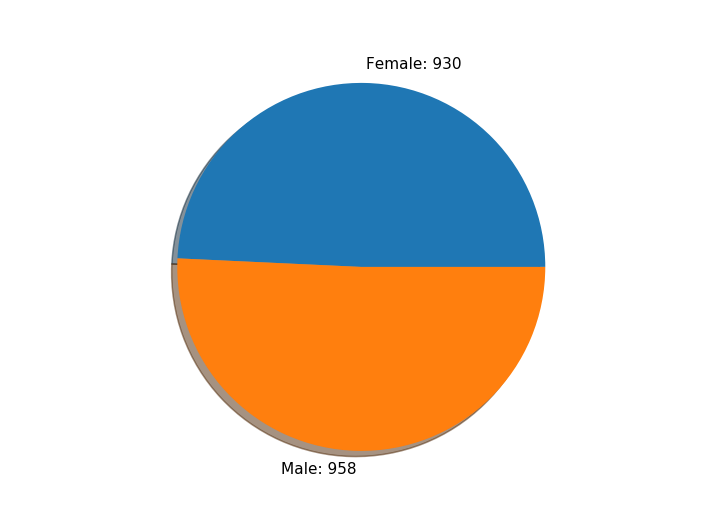

In [33]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

grouped=data[['Tumor Volume (mm3)','Sex']].groupby('Sex',as_index=False)
to_pie=grouped.count().rename(columns={'Tumor Volume (mm3)':'Count'})
to_pie['labels']=[to_pie['Sex'][i]+': '+str(to_pie['Count'][i]) for i in list(range(2))]
fig1, ax1 = plt.subplots()
ax1.pie(to_pie['Count'],  labels=to_pie['labels'], shadow=True)
ax1.axis('equal')

plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
list(data)

['Mouse ID',
 'Drug Regimen',
 'Sex',
 'Age_months',
 'Weight (g)',
 'Timepoint',
 'Tumor Volume (mm3)',
 'Metastatic Sites']

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
last=data[data['Drug Regimen'].isin('Capomulin Ramicane Infubinol Ceftamin'.split())]
# Start by getting the last (greatest) timepoint for each mouse
last=last[['Mouse ID','Timepoint']].groupby('Mouse ID',as_index=False).max()
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
last=last.merge(data[['Tumor Volume (mm3)','Mouse ID','Timepoint','Drug Regimen']],how='left',on=['Mouse ID','Timepoint'])

In [16]:
last.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Drug Regimen
0,a203,45,67.973419,Infubinol
1,a251,45,65.525743,Infubinol
2,a275,45,62.999356,Ceftamin
3,a411,45,38.407618,Ramicane
4,a444,45,43.047543,Ramicane


# Identifying outliers in Tumor Volume

First I made a boxplot of the Tumor volume for Capomulin, Ramicane, Infubinol and Ceftamin:

In [17]:
treat_dic=last[['Tumor Volume (mm3)','Drug Regimen']].groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list).to_dict()

<IPython.core.display.Javascript object>


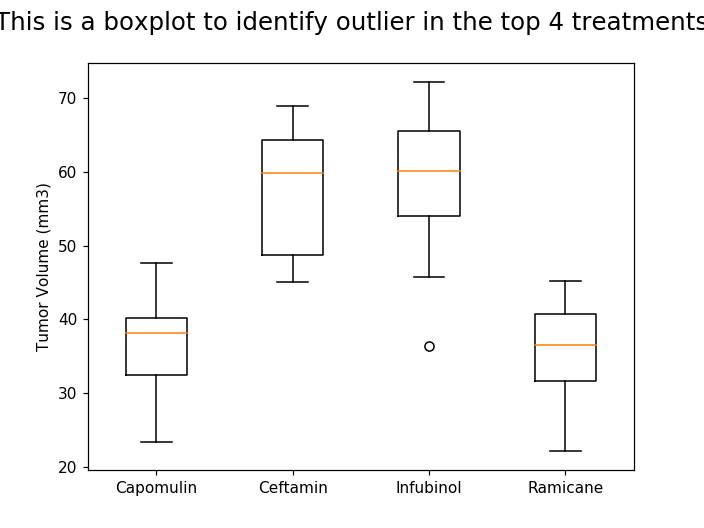

[Text(0,0,'Capomulin'),
 Text(0,0,'Ceftamin'),
 Text(0,0,'Infubinol'),
 Text(0,0,'Ramicane')]

In [18]:
fig, ax = plt.subplots()
ax.boxplot(treat_dic.values())
fig.suptitle('This is a boxplot to identify outlier in the top 4 treatments', fontsize=16)
plt.ylabel('Tumor Volume (mm3)')
ax.set_xticklabels(treat_dic.keys())

In [19]:
q_treat=pd.DataFrame(treat_dic).quantile([.25,.5,.75])

In [20]:
treatments=list(q_treat)

for treatment in treatments:
    quartiles = q_treat[treatment]
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f'In treatment: {treatment}\n')
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    above=treat_dic[treatment]>upper_bound
    below=treat_dic[treatment]<lower_bound
    
    list(compress(treat_dic[treatment], above | below))
    logic_cond=(above | below)
    if logic_cond.any():
        print('These are outliers:')
        print(list(compress(treat_dic[treatment], logic_cond)))
        print('\n')
    else:
        print('There are not outliers\n')
    

In treatment: Capomulin

There are not outliers

In treatment: Ceftamin

There are not outliers

In treatment: Infubinol

These are outliers:
[36.321345799999996]


In treatment: Ramicane

There are not outliers



## Line and Scatter Plots

In this instruction there is no point to plot a line beacuse we have several points in one period of time, to fix this I plot the average of volume for each point in time.

In [21]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
sub_df1=data[data['Drug Regimen']=='Capomulin']

In [22]:
sub_df1.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [23]:
sub_df1_mean=sub_df1[['Timepoint','Tumor Volume (mm3)']].groupby('Timepoint', as_index=False).mean()

<IPython.core.display.Javascript object>


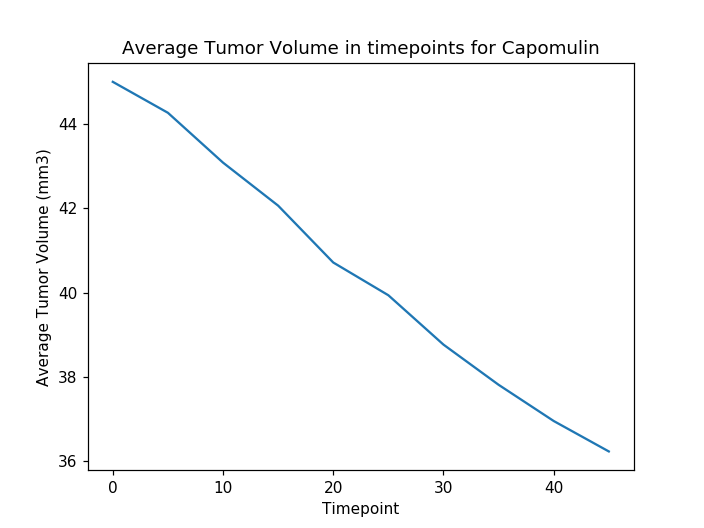

In [24]:
fig = plt.figure()
ax = plt.axes()
ax.plot(sub_df1_mean['Timepoint'],sub_df1_mean['Tumor Volume (mm3)'])
plt.title('Average Tumor Volume in timepoints for Capomulin')
plt.xlabel("Timepoint")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

<IPython.core.display.Javascript object>


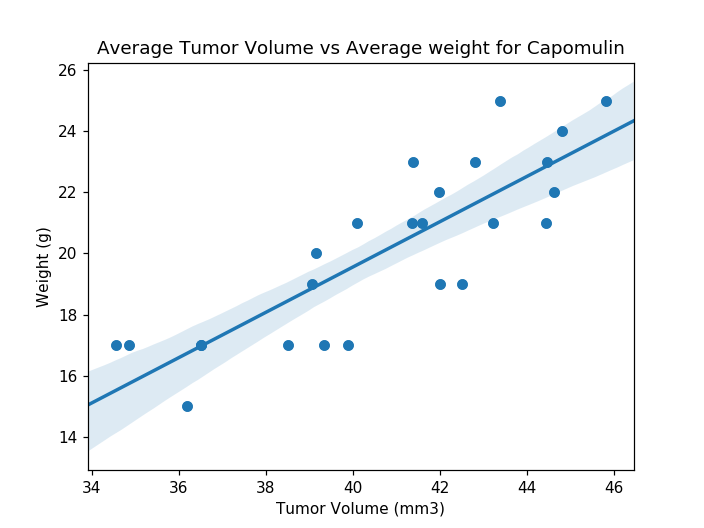

In [25]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
sub_df2_mean=sub_df1[['Mouse ID','Weight (g)','Tumor Volume (mm3)']].groupby('Mouse ID', as_index=False).mean()

fig = plt.figure()
ax = plt.axes()
ax.scatter(sub_df2_mean['Tumor Volume (mm3)'],sub_df2_mean['Weight (g)'])
plt.title('Average Tumor Volume vs Average weight for Capomulin')
plt.xlabel("Average Tumor Volume (mm3)")
plt.ylabel("Weight (g)")
plt.show()

## Correlation and Regression

In [26]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

sns.regplot(sub_df2_mean['Tumor Volume (mm3)'],sub_df2_mean['Weight (g)'])


In [27]:
x = np.array(sub_df2_mean['Tumor Volume (mm3)']).reshape((-1, 1))
y = np.array(sub_df2_mean['Weight (g)'])
model = LinearRegression().fit(x, y)
r_sq = model.score(x, y)


print('Linear regression results')
print('_'*40+'\n')
print(f'coefficient of determination: {r_sq:.2f}')
print(f'slope: {model.coef_[0]:.2f}')
print(f'intercept: {model.intercept_:.2f}\n')
print('Correlation results')
print('_'*40+'\n')
print(f'The Pearson correlation is: {scipy.stats.pearsonr(sub_df2_mean["Tumor Volume (mm3)"], sub_df2_mean["Weight (g)"])[0]:.2f}')


Linear regression results
________________________________________

coefficient of determination: 0.71
slope: 0.74
intercept: -10.15

Correlation results
________________________________________

The Pearson correlation is: 0.84
